In [1]:
import game

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

import agent

In [2]:
def visualize(stateHistory, actionHistory, rewardHistory, N):
    inventory = stateHistory[:, 0, :]
    orders = actionHistory[:, 1, :]
    serviceTimes = actionHistory[:, 0, :]
    reorderPoints = stateHistory[:, 1, :]
    
    print("Time Series")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        
        alpha = 1 if i == 2 else 0.3
#         plt.step(range(N+1), inventory[:, i] * np.roll(np.sign(orders[:, i]), -1), label="inventory")        
        plt.plot(range(N+1), inventory[:, i], label="inventory", alpha=alpha, c='b', linestyle='--', drawstyle='steps')
        plt.step(range(N+1), orders[:, i], label="order quantity", c='orange')
        if i == 2:
            plt.step(range(N+1), reorderPoints[:, i], label="reorder point", c='green')
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Service Time")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), serviceTimes[:, i], label="service time")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    
    print("Inventory")
    for i in range(2, -1, -1):
        plt.figure(figsize=(20, 4))
        plt.step(range(N+1), inventory[:, i] * np.sign(orders[:, i]), label="inventory")
        plt.ylim((-5, 30))
        plt.legend()
    plt.show()

    print("Rewards")
    plt.figure(figsize=(20, 4))
    plt.step(range(N+1), rewardHistory)
    plt.show()

In [19]:
learningParams = {
    "gamma": 0.2,
    "alpha": 1,
    "epsilon": 0.5
}

envParams = {
    "inventoryCost": [100, 5, 100],
    "muDemand": 2,
    "stdDemand": 0, #0.1, #1,
    "retailerOrder": 10,
    "stockoutCost": 10000,
    "N": 100
}

In [20]:
# create central planner
plannerAgent = agent.Planner(learningParams, envParams["retailerOrder"])

Time Series


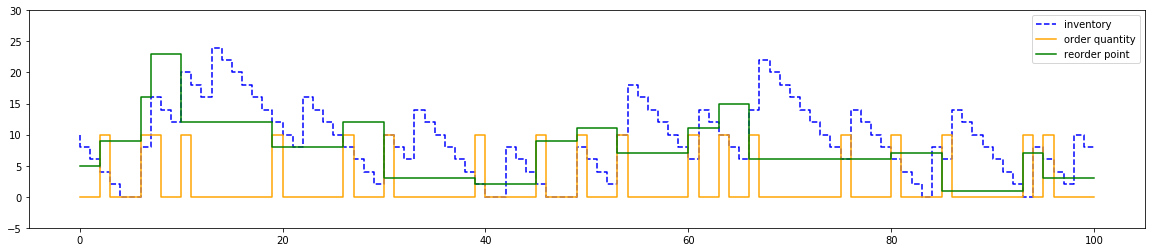

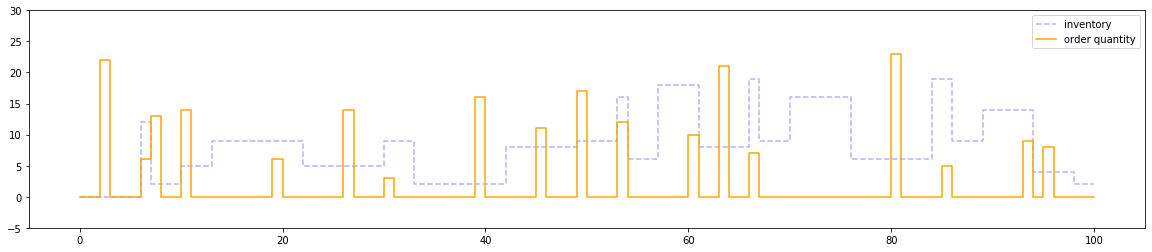

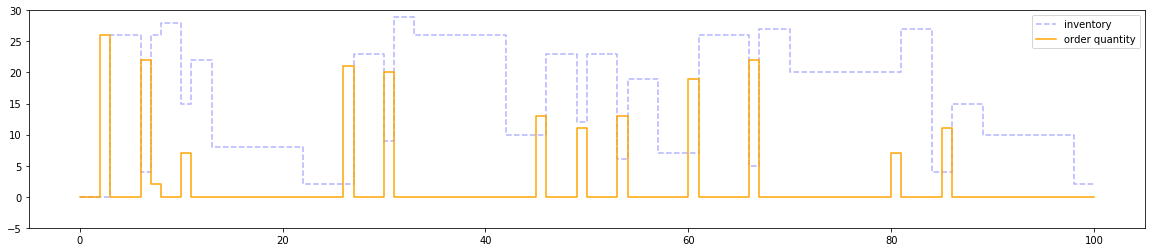

Service Time


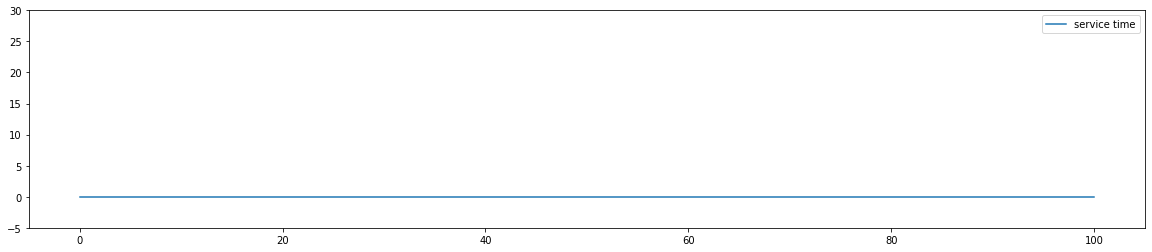

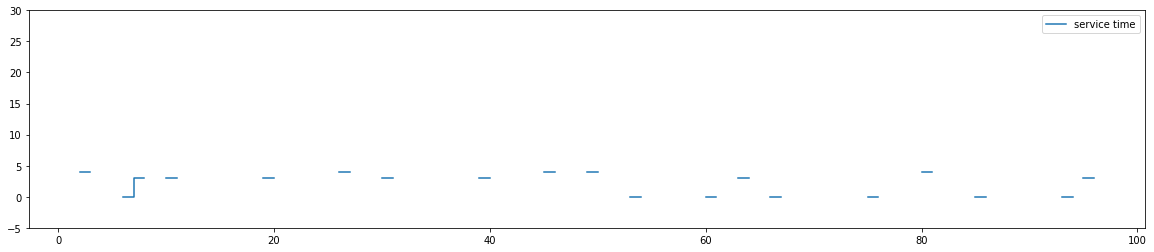

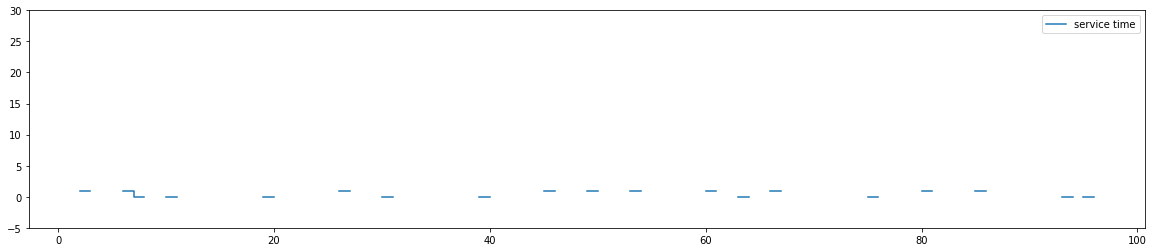

Inventory


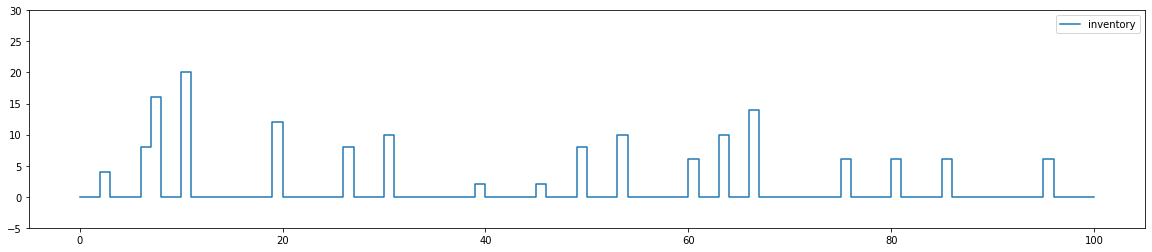

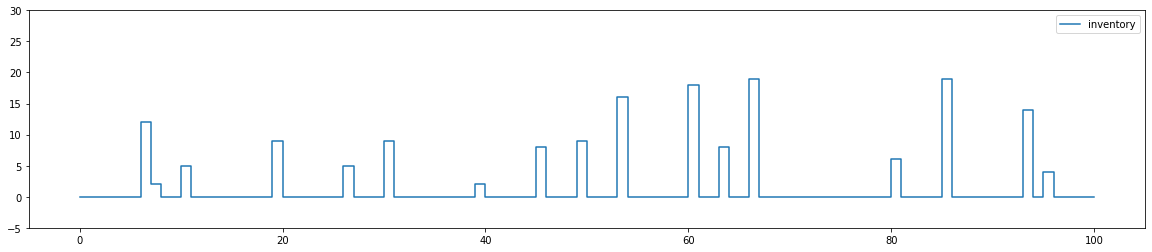

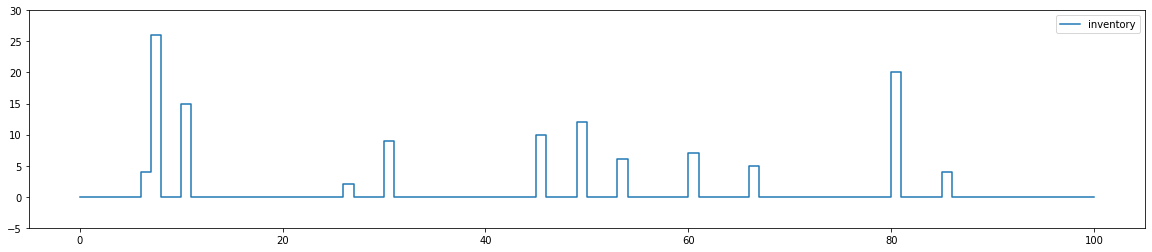

Rewards


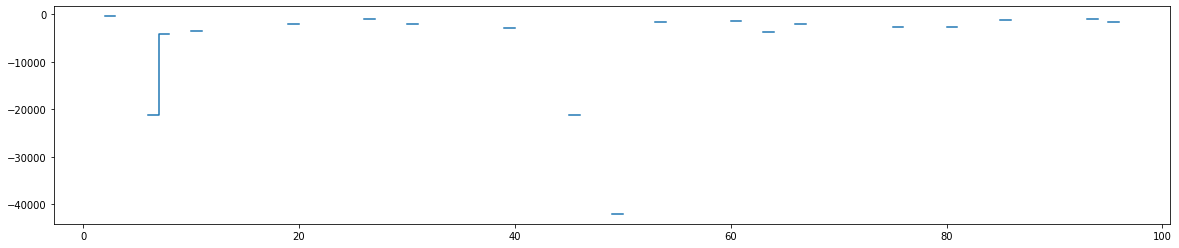

In [21]:
# play the game while training
stateHistory, actionHistory, rewardHistory = game.runEpisode(envParams, plannerAgent, train=True)

visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

In [22]:
for _ in tqdm(range(5000)):
# play the game while training
    game.runEpisode(envParams, plannerAgent, train=True)

100%|██████████| 5000/5000 [00:28<00:00, 176.81it/s]


Time Series


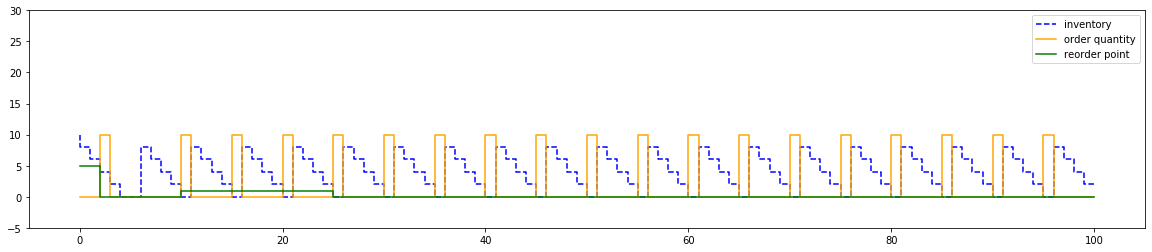

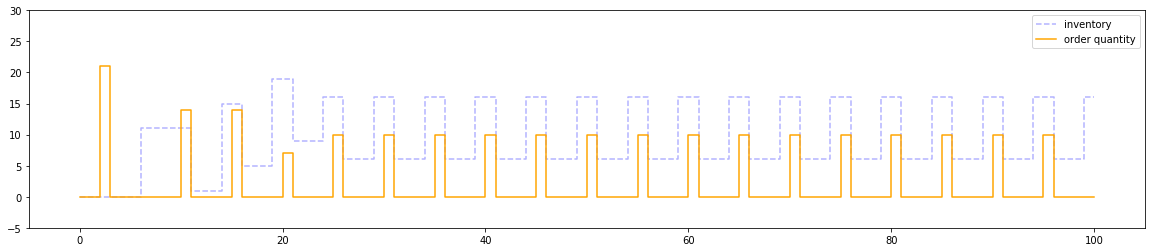

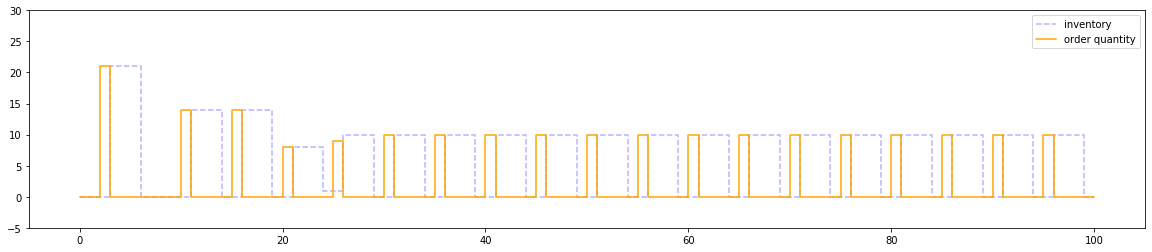

Service Time


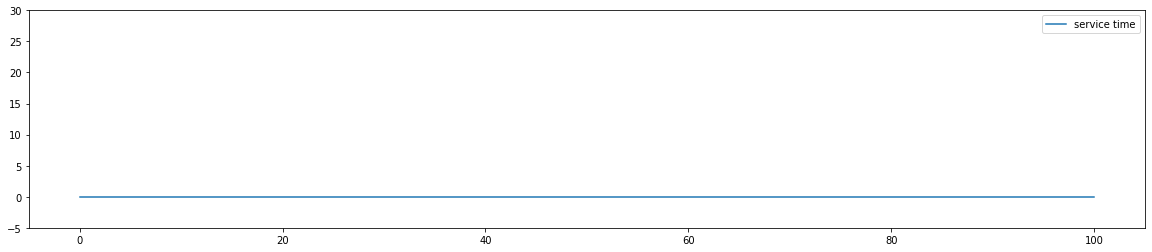

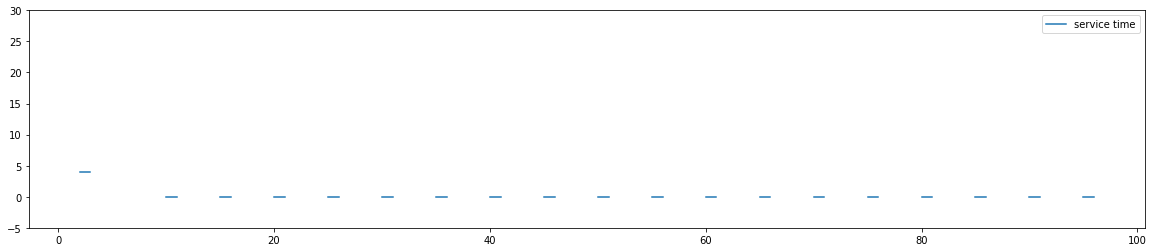

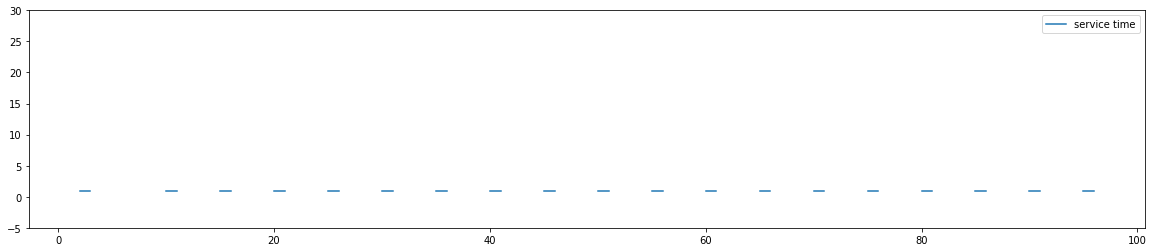

Inventory


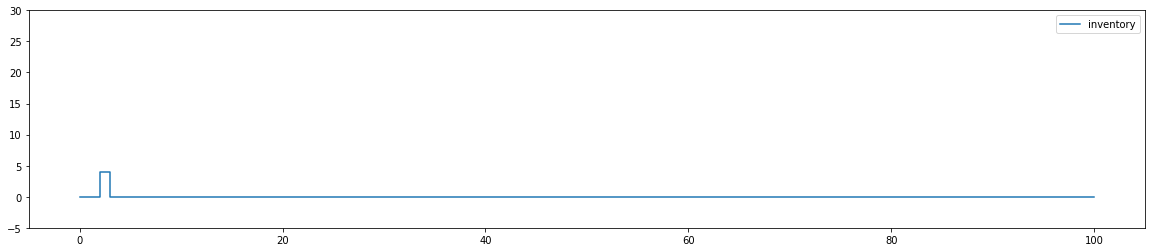

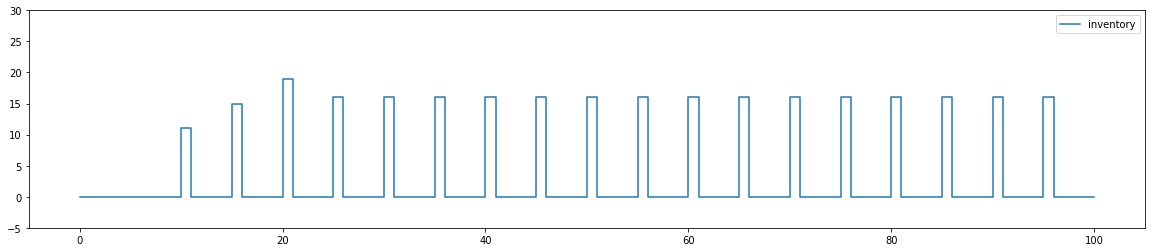

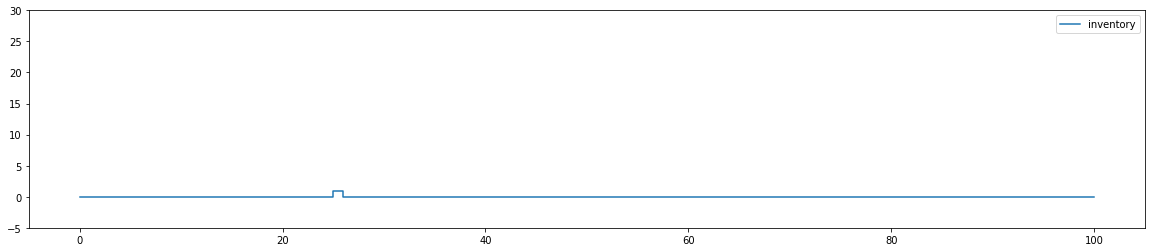

Rewards


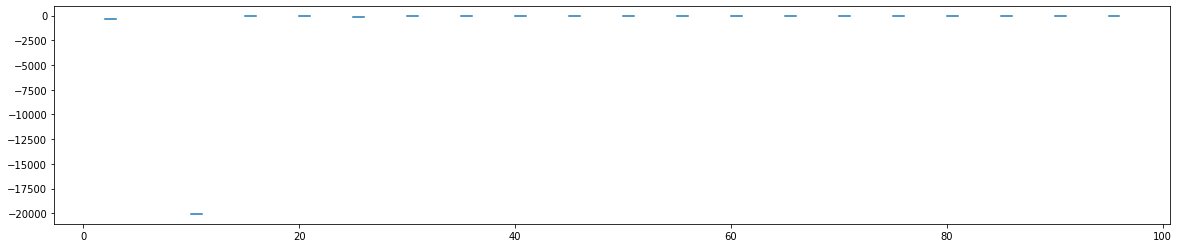

In [23]:
# play the game while training
plannerAgent.epsilon = 0

stateHistory, actionHistory, rewardHistory = game.runEpisode(envParams, plannerAgent, train=False)
visualize(stateHistory, actionHistory, rewardHistory, envParams["N"])

In [17]:
# X = []
# Y = []
# size = []

# minVal = min(plannerAgent.q.obj['0_0'].values())

# for k, v in plannerAgent.q.obj['0_0'].items():
#     x, y = k.split("_")
#     X.append(float(x))
#     Y.append(float(y))
    
#     s = int(v - minVal)
#     size.append(s)
    
# plt.figure(figsize=(10, 10))
# plt.scatter(X, Y, s=size, alpha=0.3)

In [18]:
plannerAgent.q.obj

# there's a bias here. whenever that state is trained, it's always reordering
# need to think of state, action again

{'0_0_4': {'29.0_19.0_10.0_0.0': -29201.0,
  '26.0_25.0_10.0_4.0': -22161.2883560673,
  '29.0_17.0_10.0_2.0': -29305.0,
  '21.0_11.0_10.0_8.0': -22702.0,
  '20.0_18.0_10.0_10.0': -22052.0,
  '22.0_14.0_10.0_5.0': -22584.4,
  '28.0_14.0_10.0_12.0': -21816.0,
  '22.0_20.0_10.0_10.0': -22002.78151009911,
  '23.0_11.0_10.0_4.0': -20751.36228937436,
  '21.0_21.0_10.0_13.0': -22073.2069864673,
  '29.0_23.0_10.0_13.0': -22461.90435594308,
  '22.0_20.0_10.0_9.0': -22104.0,
  '29.0_27.0_10.0_8.0': -22837.688789382202,
  '28.0_26.0_10.0_3.0': -22043.459666666666,
  '13.0_11.0_10.0_7.0': -22388.0,
  '19.0_19.0_10.0_2.0': -29331.333115836143,
  '29.0_20.0_10.0_9.0': -22142.2,
  '19.0_11.0_10.0_10.0': -20940.0,
  '27.0_26.0_10.0_8.0': -22723.6832,
  '22.0_22.0_10.0_10.0': -22167.135711978666,
  '19.0_14.0_10.0_6.0': -21239.470707218316,
  '24.0_14.0_10.0_0.0': -28696.959186666667,
  '13.0_13.0_10.0_0.0': -32423.0,
  '22.0_21.0_10.0_10.0': -22132.491666666665,
  '14.0_12.0_10.0_9.0': -21010.0,
  '29